# Análise dos dados obtidos pelos sensores

## Inicial

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from Adafruit_IO import Client
from datetime import datetime

## Funções

In [2]:
# Função para gerar Gráficos

def gera_historico(dataframe, campo_x:str, campo_y:str, titulo:str, texto_y:str):

    # Ordenação do dataframe
    dataframe = dataframe.sort_values(by=campo_x)

    # Criação do gráfico
    plt.figure(figsize=(8, 6))
    plt.plot(dataframe[campo_x], dataframe[campo_y], marker='o', linestyle='', markersize=4)
    plt.title(f'Histórico: {titulo}')
    plt.xlabel('Data')
    plt.ylabel(texto_y)
    plt.grid(True)
    plt.xticks(rotation=45)  
    plt.tight_layout()
    plt.show()

## Leitura dos sensores

In [4]:
# Atenticação
credenciais = Client('usuario', 'chave')

# Registros
registros = 2500

# Valores dos sensores
dht11_temp    = credenciais.data("pi-6.dht11-temp", max_results=registros)
mq135_gases = credenciais.data("pi-6.mq135", max_results=registros) 
bmp180_pressao = credenciais.data("pi-6.bmp180", max_results=registros)

In [5]:
# Dataframes
df_dht11_temp = pd.DataFrame(dht11_temp)
df_dht11_umid = pd.DataFrame(dht11_umidade)
df_mq135_gases = pd.DataFrame(mq135_gases)
df_bmp180_pressao = pd.DataFrame(bmp180_pressao)

In [1]:
# Salvando dados originais como csv para guardar histórico

df_dht11_temp.to_csv('../dados/dh11_temp.csv', index=False)
df_mq135_gases.to_csv('../dados/mq135_gases.csv', index=False)
df_bmp180_pressao.to_csv('../dados/bmp180_pressao.csv', index=False)

NameError: name 'df_dht11_temp' is not defined

In [4]:
# Leitura dos dados csv (caso não consiga conectar à API)

df_dht11_temp= pd.read_csv('../dados/dht11_temp.csv')
df_dht11_umidade= pd.read_csv('../dados/dht11_umidade.csv')
df_mq135_gases= pd.read_csv('../dados/mq135_gases.csv')
df_bmp180_pressao= pd.read_csv('../dados/bmp180_pressao.csv')

### Exemplos dos dados

In [5]:
#Exemplo DHT11
df_mq135_gases.head()

created_epoch            created_at  updated_at  value  completed_at  \
0     1715086800  2024-05-07T10:00:00Z         NaN    630           NaN   
1     1715088600  2024-05-07T10:30:00Z         NaN    635           NaN   
2     1715090400  2024-05-07T11:00:00Z         NaN    635           NaN   
3     1715092200  2024-05-07T11:30:00Z         NaN    637           NaN   
4     1715094000  2024-05-07T12:00:00Z         NaN    633           NaN   

   feed_id  expiration  position                          id  lat  lon  ele  
0  9847011         NaN       NaN  HWSO74HK9ZB9CSXZINMGAG3SHM  NaN  NaN  NaN  
1  9847011         NaN       NaN  5BLJ4BVTGIPPTKCCRLU594IQCT  NaN  NaN  NaN  
2  9847011         NaN       NaN  LJZTBP8WVVY9AIWRIIQJULCIB2  NaN  NaN  NaN  
3  9847011         NaN       NaN  H3ECJOFBNNBFKH8652D7JSSBK6  NaN  NaN  NaN  
4  9847011         NaN       NaN  9GNEFSUP02LGQ2SSKLL7EHH6GI  NaN  NaN  NaN

## Organização e limpeza dos DataFrames

In [6]:
dict_df = {"dht11_temp": df_dht11_temp, 
            "dht11_umidade": df_dht11_umidade, 
            "mq135_gases": df_mq135_gases,
            "bmp180_pressao": df_bmp180_pressao}

In [7]:
# Filtro de colunas

for nome, dataframe in dict_df.items():
    dict_df[nome] = dataframe.loc[:, ["created_epoch", "created_at", "value", "id"]]

In [8]:
# Convertendo tipo de algumas colunas

for nome, dataframe in dict_df.items():
    dict_df[nome]['created_at'] = pd.to_datetime(dataframe['created_at'])
    dict_df[nome]['Data'] = dict_df[nome]['created_at'].dt.date
    dict_df[nome]['Hora'] = dict_df[nome]['created_at'].dt.time

In [9]:
# Convertendo value para inteiro

for nome, dataframe in dict_df.items():
    if nome == "bmp180_pressao":
        # Converter Pa em hPa
        dict_df[nome]['value'] = dict_df[nome]['value']/100
    dict_df[nome]['value'] = pd.to_numeric(dataframe['value'], errors='coerce')\
                               .fillna(-1).astype(int)

## Dados Históricos

### Nível de gases tóxicos

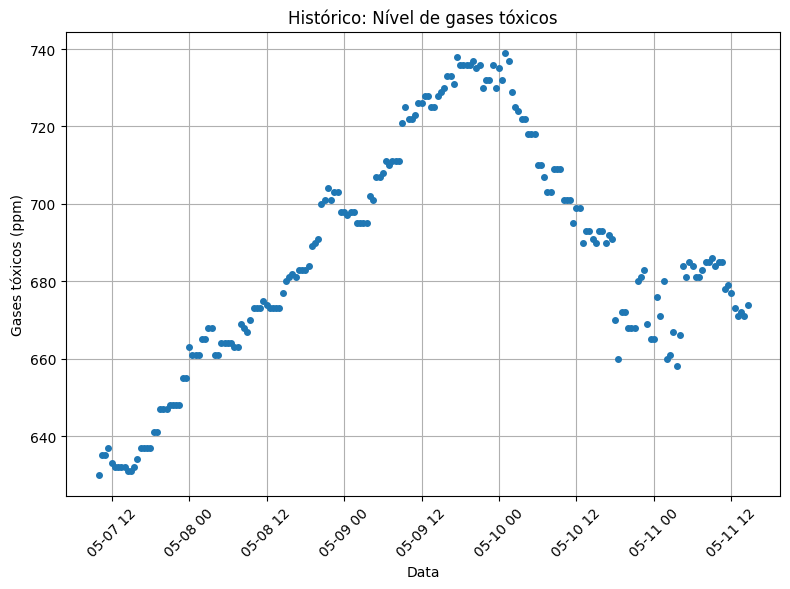

In [10]:
gera_historico(dataframe = dict_df['mq135_gases'], 
                    campo_x = 'created_at', 
                    campo_y = 'value', 
                    titulo  = 'Nível de gases tóxicos',
                    texto_y = 'Gases tóxicos (ppm)')

### Temperatura ambiente

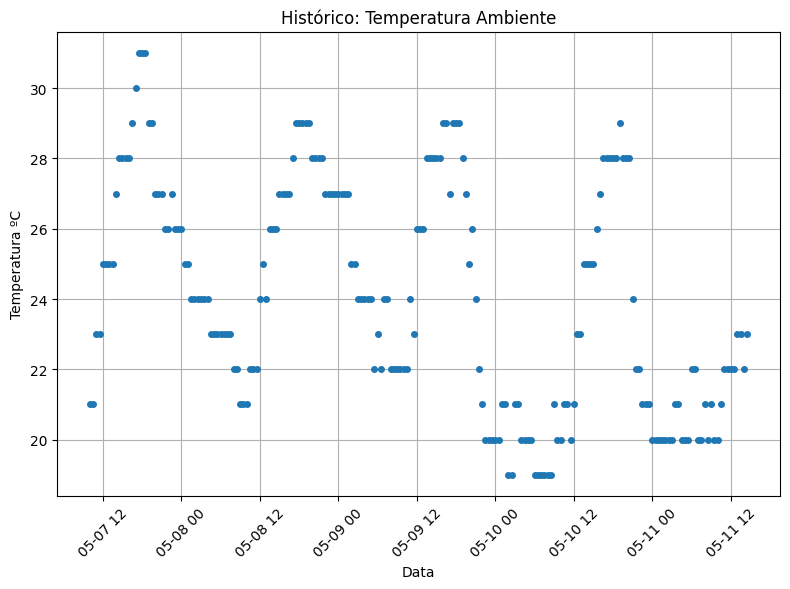

In [11]:
gera_historico(dataframe = dict_df['dht11_temp'], 
                    campo_x = 'created_at', 
                    campo_y = 'value', 
                    titulo  = 'Temperatura Ambiente', 
                    texto_y = 'Temperatura ºC')

### Umidade relativa do ar

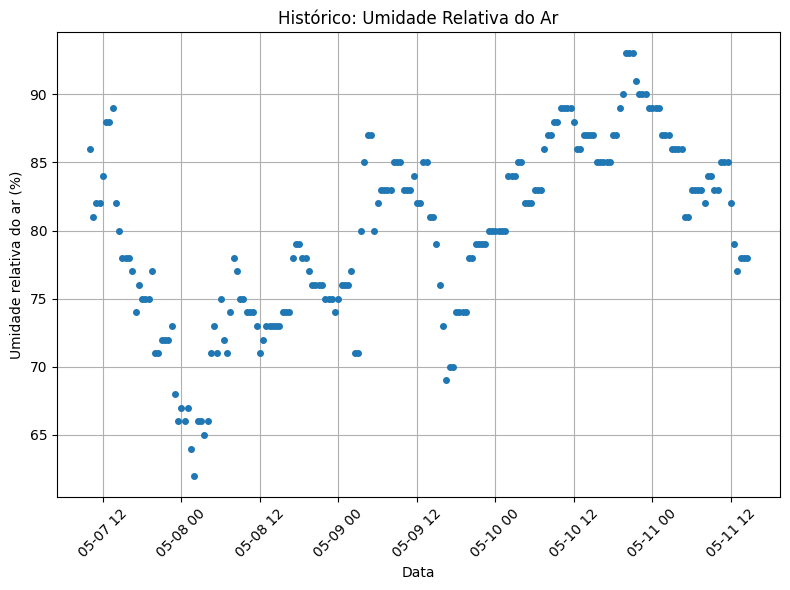

In [12]:
gera_historico(dataframe = dict_df['dht11_umidade'], 
                    campo_x = 'created_at', 
                    campo_y = 'value', 
                    titulo  = 'Umidade Relativa do Ar', 
                    texto_y = 'Umidade relativa do ar (%)')

### Pressão Atmosférica

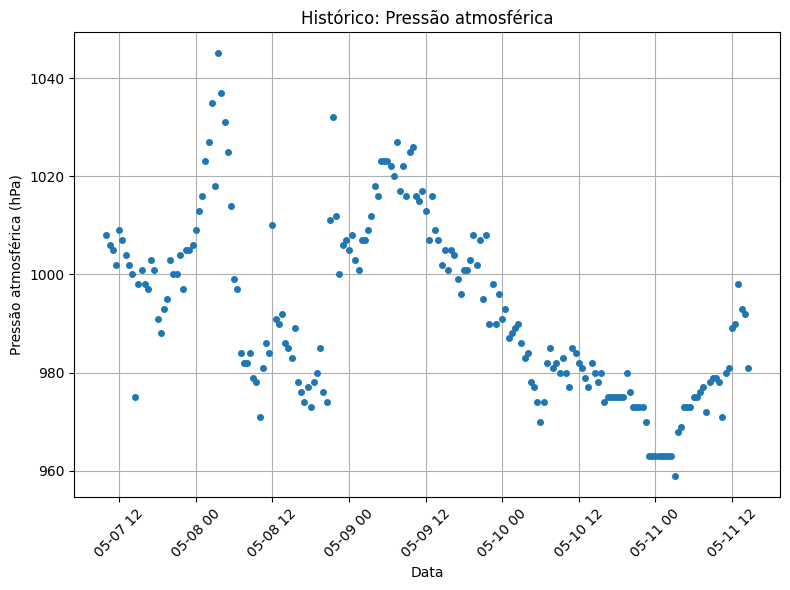

In [35]:
gera_historico(dataframe = dict_df['bmp180_pressao'], 
                    campo_x = 'created_at', 
                    campo_y = 'value', 
                    titulo  = 'Pressão atmosférica', 
                    texto_y = 'Pressão atmosférica (hPa)')

## Frequências

### Histograma com nível de gases tóxicos

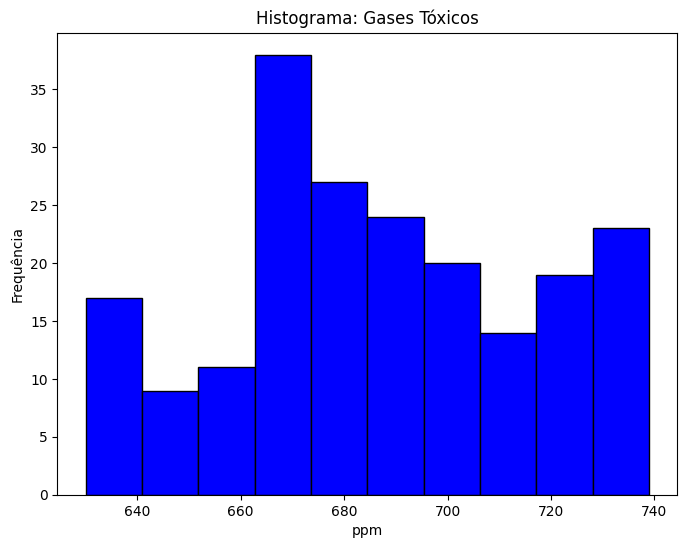

In [14]:
valores_gases = dict_df['mq135_gases']['value']

plt.figure(figsize=(8, 6))
plt.hist(valores_gases, bins=10, color='blue', edgecolor='black')
plt.title('Histograma: Gases Tóxicos')
plt.xlabel('ppm')
plt.ylabel('Frequência')
plt.show()

### Histograma com pressão atmosférica

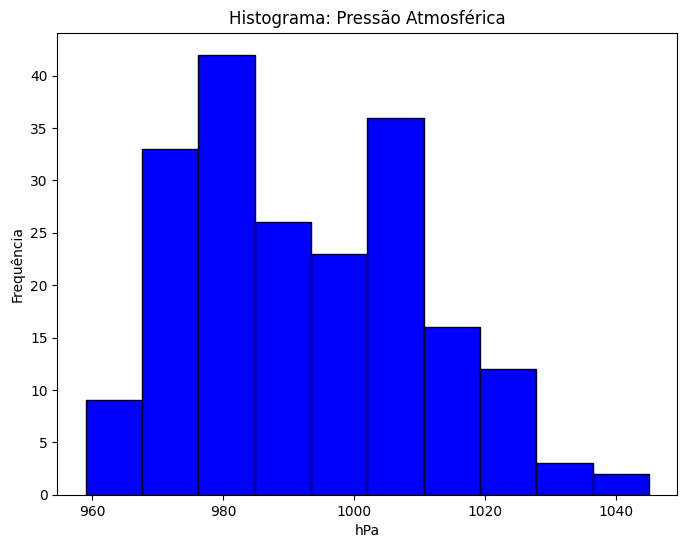

In [36]:
valores_pressao = dict_df['bmp180_pressao']['value']

plt.figure(figsize=(8, 6))
plt.hist(valores_pressao, bins=10, color='blue', edgecolor='black')
plt.title('Histograma: Pressão Atmosférica')
plt.xlabel('hPa')
plt.ylabel('Frequência')
plt.show()

### Histograma com temperatura ambiente

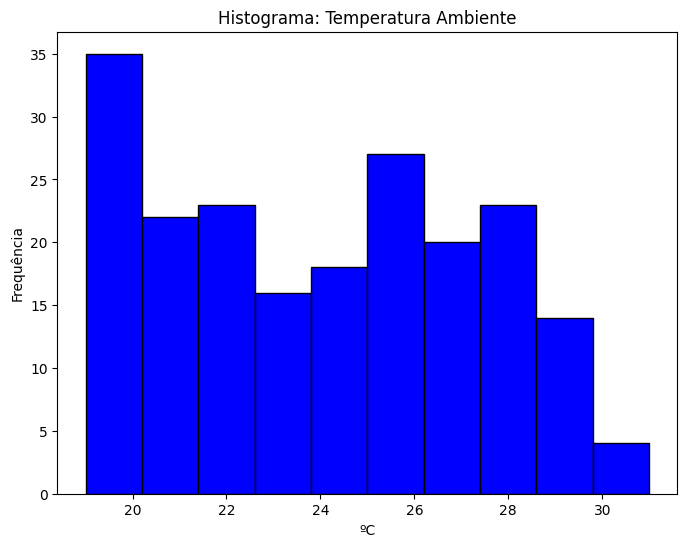

In [16]:
valores_temp = dict_df['dht11_temp']['value']

plt.figure(figsize=(8, 6))
plt.hist(valores_temp, bins=10, color='blue', edgecolor='black')
plt.title('Histograma: Temperatura Ambiente')
plt.xlabel('ºC')
plt.ylabel('Frequência')
plt.show()

### Histograma com umidade relativa do ar

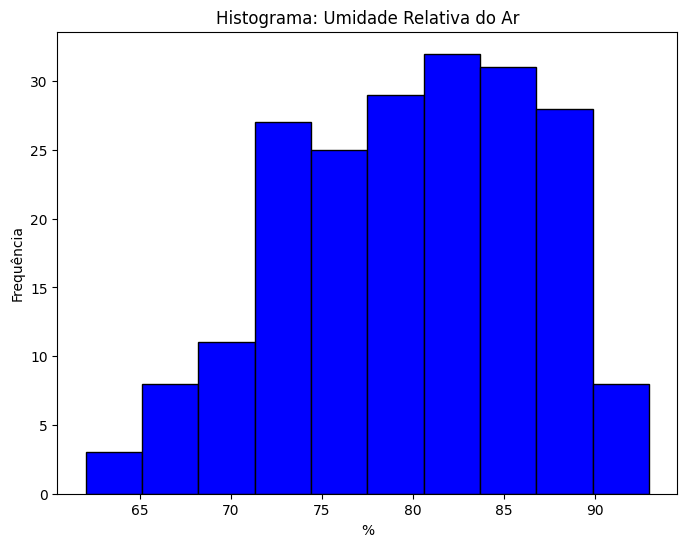

In [17]:
valores_umidade = dict_df['dht11_umidade']['value']

plt.figure(figsize=(8, 6))
plt.hist(valores_umidade, bins=10, color='blue', edgecolor='black')
plt.title('Histograma: Umidade Relativa do Ar')
plt.xlabel('%')
plt.ylabel('Frequência')
plt.show()

## Horários com maior intensidade

### Gases tóxicos

In [18]:
# Agrupamento e ordenação dos dados
df_mq135_filter = dict_df['mq135_gases'][['Data', 'Hora', 'value']].copy()
df_mq135_filter.loc[:, 'rank'] = df_mq135_filter.groupby('Data')['value'].rank(ascending=False, method='first')
df_mq135_filter = df_mq135_filter.sort_values(['Data', 'rank'], ascending=[True, True])

In [19]:
# Pegando o último registro
df_mq135_filter = df_mq135_filter[df_mq135_filter['rank']==1.0]

In [20]:
# Transformação do campo Hora
df_mq135_filter['Hora_Num'] = pd.to_datetime(df_mq135_filter['Hora'], format='%H:%M:%S', errors='coerce').dt.hour

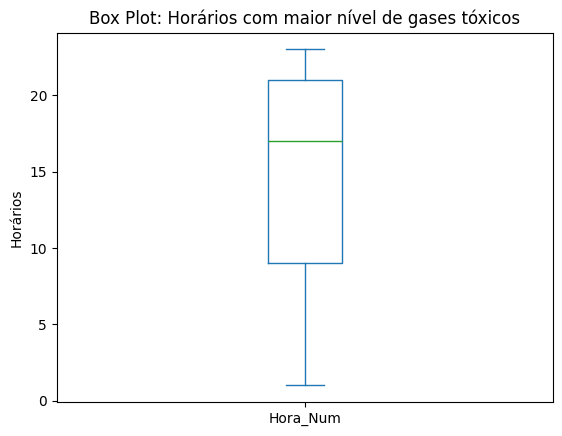

In [21]:
df_mq135_filter['Hora_Num'].plot(kind='box')

plt.title('Box Plot: Horários com maior nível de gases tóxicos')
plt.ylabel('Horários')
plt.show()

### Pressão Atmosférica

In [22]:
# Agrupamento e ordenação dos dados
df_bmp180_filter = dict_df['mq135_gases'][['Data', 'Hora', 'value']].copy()
df_bmp180_filter.loc[:, 'rank'] = df_bmp180_filter.groupby('Data')['value'].rank(ascending=False, method='first')
df_bmp180_filter = df_bmp180_filter.sort_values(['Data', 'rank'], ascending=[True, True])

In [23]:
# Pegando o último registro
df_bmp180_filter = df_bmp180_filter[df_bmp180_filter['rank']==1.0]

In [24]:
# Transformação do campo Hora
df_bmp180_filter['Hora_Num'] = pd.to_datetime(df_bmp180_filter['Hora'], format='%H:%M:%S', errors='coerce').dt.hour

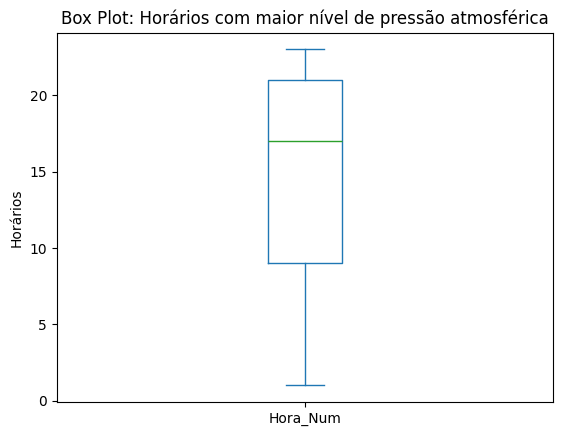

In [25]:
df_bmp180_filter['Hora_Num'].plot(kind='box')

plt.title('Box Plot: Horários com maior nível de pressão atmosférica')
plt.ylabel('Horários')
plt.show()

### Temperatura Ambiente

In [26]:
# Agrupamento e ordenação dos dados
df_dht11_filter = dict_df['dht11_temp'][['Data', 'Hora', 'value']].copy()
df_dht11_filter.loc[:, 'rank'] = df_dht11_filter.groupby('Data')['value'].rank(ascending=False, method='first')
df_dht11_filter = df_dht11_filter.sort_values(['Data', 'rank'], ascending=[True, True])

In [27]:
# Pegando o último registro
df_dht11_filter = df_dht11_filter[df_dht11_filter['rank']==1.0]

In [28]:
# Transformação do campo Hora
df_dht11_filter['Hora_Num'] = pd.to_datetime(df_dht11_filter['Hora'], format='%H:%M:%S', errors='coerce').dt.hour

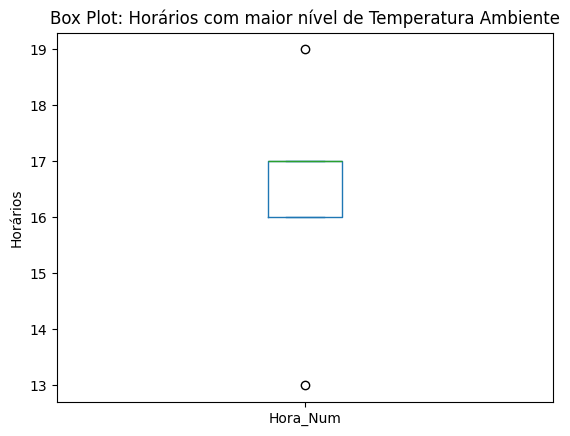

In [29]:
df_dht11_filter['Hora_Num'].plot(kind='box')

plt.title('Box Plot: Horários com maior nível de Temperatura Ambiente')
plt.ylabel('Horários')
plt.show()

### Umidade Relativa do Ar

In [30]:
# Agrupamento e ordenação dos dados
df_dht11_umidade_filter = dict_df['dht11_umidade'][['Data', 'Hora', 'value']].copy()
df_dht11_umidade_filter.loc[:, 'rank'] = df_dht11_umidade_filter.groupby('Data')['value'].rank(ascending=False, method='first')
df_dht11_umidade_filter = df_dht11_umidade_filter.sort_values(['Data', 'rank'], ascending=[True, True])

In [31]:
# Pegando o último registro
df_dht11_umidade_filter = df_dht11_umidade_filter[df_dht11_umidade_filter['rank']==1.0]

In [32]:
# Transformação do campo Hora
df_dht11_umidade_filter['Hora_Num'] = pd.to_datetime(df_dht11_umidade_filter['Hora'], format='%H:%M:%S', errors='coerce').dt.hour

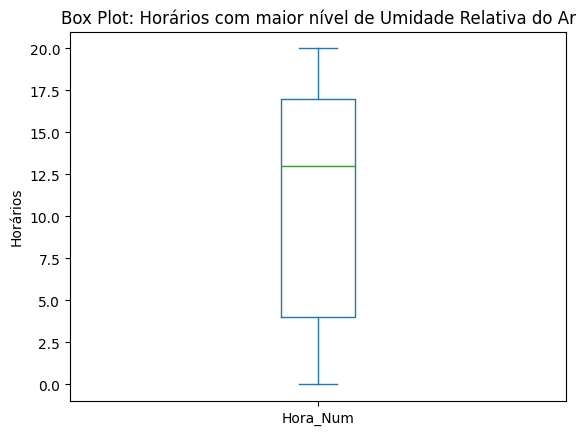

In [34]:
df_dht11_umidade_filter['Hora_Num'].plot(kind='box')

plt.title('Box Plot: Horários com maior nível de Umidade Relativa do Ar')
plt.ylabel('Horários')
plt.show()